#Define library

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics,model_selection,preprocessing,neighbors,svm,tree
import pandas as pd

#Preparation of data
- Load (`mnist`) data 
- Split data into `(x_train,y_train)` and `(x_test,y_test)`  
- normalize (`x_train`) by dividing it by 255
- Reshape data from (`60000,28,28`) to (`60000,784`)
- We take a sample of the data (`35000`)
- Set random seed to 42 for using NumPy

In [ ]:
data = tf.keras.datasets.mnist.load_data()
(x_train,y_train),(x_test,y_test)=data

x_train=x_train/255

x_train=x_train.reshape(-1,28*28)

x_data = x_train[:35000,:]
y_data = y_train[:35000]
np.random.seed(42)

#Split the dataset into a training/testing
- Make `test_size=0.14285` to split data into `30000` for training and `5000` for testing

In [ ]:
x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_data,y_data, test_size=0.14285, random_state=42, stratify=y_data)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((30000, 784), (5000, 784), (30000,), (5000,))

#SKlearn Models

##kNN model

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=10)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

In [ ]:
print(f'the accuracy is : {metrics.accuracy_score(y_stest,y_pred)}')

the accuracy is : 0.9616


##SVM model


In [ ]:
svm_model = svm.SVC(C=10)
svm_model.fit(x_strain, y_strain)
y_preds = svm_model.predict(x_stest)

In [ ]:
print(f'the accuracy is : {metrics.accuracy_score(y_stest,y_preds)}')

the accuracy is : 0.9832


##Tree model

In [ ]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_strain, y_strain)
y_predt = tree_model.predict(x_stest)

In [ ]:
print(f'the accuracy is : {metrics.accuracy_score(y_stest,y_predt)}')

the accuracy is : 0.8502


#DNN

- One Hot encode for `y_train` data
- split data into `30000` for training and `5000` for testing(valdation)

In [ ]:
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))

x_train=x_train[30000:]
y_train_hot=y_train_hot[30000:]
x_val=x_train[:5000]
y_val=y_train_hot[:5000]


- Craet DNN model 
- The first layer consists of (**350**) neurons with a drop operator (**0.8**)
- The second layer consists of (**256**) neurons with a drop operator (**0.3**) 
- The activation function that used is (**ReLu**)


In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(784)),
                                  tf.keras.layers.Dense(units=350,activation=tf.nn.relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                  tf.keras.layers.Dropout(0.8),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(units=10,activation=tf.nn.softmax,name='output')
])


- The optimizer function is `Adam()`
- The loss function is `CategoricalCrossentropy()`
- The metrics is `acc`
- fit the data with model Properties (`batch_size=256,epochs=100`) 

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
model.fit(x=x_train,y=y_train_hot,batch_size=256,epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
118/118 [==============================] - 1s 6ms/step - loss: 1.0377 - acc: 0.6575 - val_loss: 0.3613 - val_acc: 0.8978
Epoch 2/100
118/118 [==============================] - 1s 5ms/step - loss: 0.5070 - acc: 0.8399 - val_loss: 0.2549 - val_acc: 0.9232
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4162 - acc: 0.8721 - val_loss: 0.2133 - val_acc: 0.9362
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3636 - acc: 0.8894 - val_loss: 0.1816 - val_acc: 0.9460
Epoch 5/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3239 - acc: 0.9018 - val_loss: 0.1604 - val_acc: 0.9494
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3084 - acc: 0.9066 - val_loss: 0.1485 - val_acc: 0.9540
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 0.2862 - acc: 0.9129 - val_loss: 0.1307 - val_acc: 0.9578
Epoch 8/100
118/118 [==============================] - 1s 5ms/step - 

- print a graph for accuracy & loss 


157/157 [==============================] - 0s 3ms/step - loss: 0.0167 - acc: 0.9966


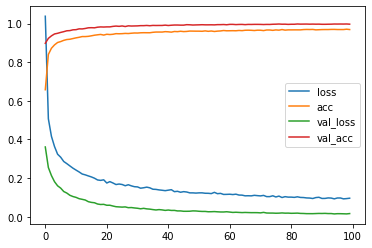

In [ ]:
Graph =pd.DataFrame(model.history.history)
Graph.plot()
loss,acc = model.evaluate(x=x_val,y=y_val)

- print the value of accuracy & loss 

In [ ]:
print(f'the accuracy is : {acc}')
print(f'the loss  is : {loss}')

the accuracy is : 0.9965999722480774
the loss  is : 0.01669037714600563


#The Rsult
It took about 9 hours of my life for testing time

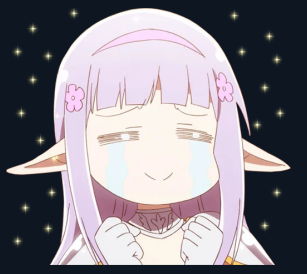

After testing the four models. We note that the best results came from the model (ٍDNN). According to the accuracy & loss values , it is the best model in predicting compared to the rest of the models tested in this example

In [ ]:
print(f'the accuracy for KNN model is : {metrics.accuracy_score(y_stest,y_pred)}')
print(f'the accuracy for SVM model is : {metrics.accuracy_score(y_stest,y_preds)}')
print(f'the accuracy for Tree model is : {metrics.accuracy_score(y_stest,y_predt)}')
print("-"*50)
print(f'the accuracy for DNN model is : {acc}')
print(f'the loss for DNN model is : {loss}')


the accuracy for KNN model is : 0.9616
the accuracy for SVM model is : 0.9832
the accuracy for Tree model is : 0.8502
--------------------------------------------------
the accuracy for DNN model is : 0.9965999722480774
the loss for DNN model is : 0.01669037714600563
